In [1]:
# import libraries

import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
import seaborn as sns


# special matplotlib argument for improved plots
from matplotlib import rcParams


%matplotlib inline
sns.set(rc={"figure.figsize": (10, 8)})

In [2]:
# pulling the data

r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
data = r.text.replace('\n', ' ').split(" ")
data = list(filter(lambda x: x != '', data))
feats = ["CRIM","ZN","INDUS","CHAS","NOX","RM", "AGE","DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"] 
df = pd.DataFrame(columns=feats)
num = int(len(data)/14)
for i in range(num):
    df.loc[i] = data[i*14:i*14+14]
df.to_csv("housing.csv", index=False)

In [3]:
# read into dataframe

data = pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(data.shape)

(506, 14)


In [5]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# we see that there is no missing data

In [7]:
# analyse the target column
data['MEDV'].describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


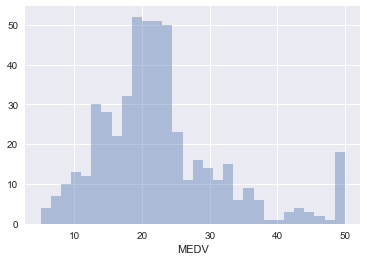

In [8]:
# to get a better understanding of the distribution of the MEDV variable
sns.distplot(data['MEDV'], bins=30, kde=False)
plt.show()

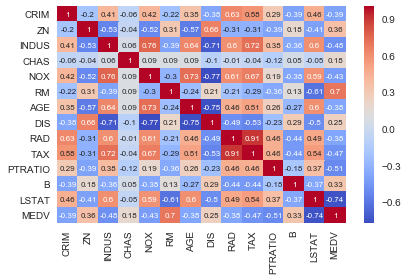

In [9]:
# visualise the correlation between all variables in the dataset using a heatmap
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

In [10]:
# from the heatmap, we can see that 
# the three variables with the strongest correlation to MEDV 
# are the LSTAT (percentage of homeowners in the neighborhood considered "lower class"),
# RM (average number of rooms per dwelling) and PTRATIO (pupil-teacher ratio by town)
# We can also use the heatmap to check for correlation between variables so that we don’t include multicollinearity into a linear regression.
# For example both RAD and TAX are highly correlated (0.91) so they shouldn’t be used in a linear regression at the same time.

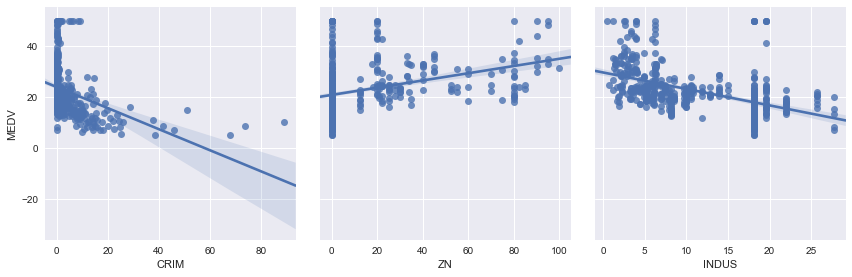

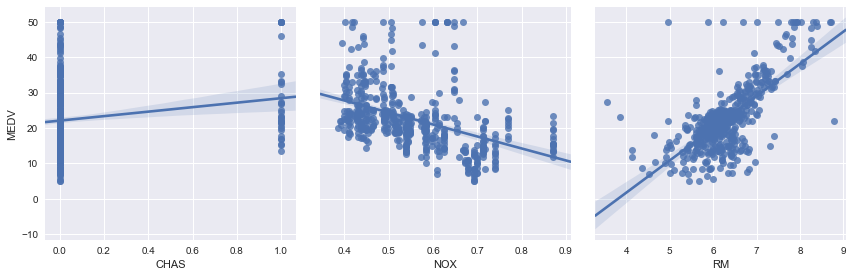

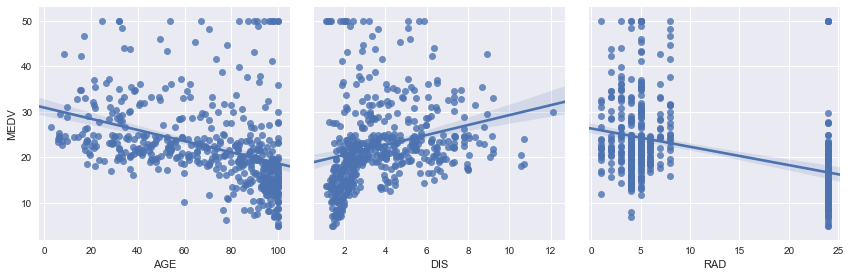

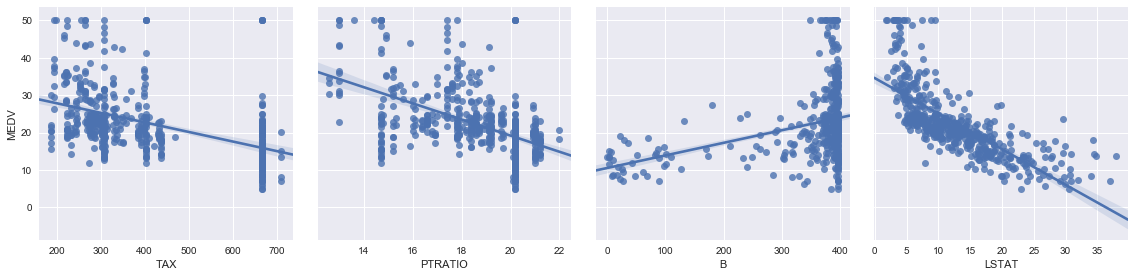

In [11]:
# view the relationship between each variable against the target variable "MEDV"
x_vars1 = ['CRIM','ZN','INDUS']
x_vars2 = ['CHAS','NOX','RM']          
x_vars3 = ['AGE','DIS', 'RAD']          
x_vars4 = ['TAX','PTRATIO', 'B', 'LSTAT']          
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars1, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars2, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars3, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars4, y_vars=y_vars, kind="reg", size=4)


In [12]:
# the pairplots confirms our findings from the heatmap.
# i.e
# the three variables with the strongest correlation to MEDV are the 
# LSTAT(percentage of homeowners in the neighborhood considered "lower class")),
# RM (average number of rooms per dwelling) and PTRATIO (pupil-teacher ratio by town)
# we can also see that some other variables have a moderate correlation to MEDV 
# these are: INDUS, NOX, TAX
# the pairplots aligns with our intuition that 
# 1) An increase in value of RM would generally result in the increase of MEDV. 
# 2) An increase in value of LSTAT would decrease the value of MEDV.
# 3) An increase in value of PTRATIO would decrease the value of MEDV.

In [13]:
# Create X and y matrix

X = data.drop('MEDV', axis = 1)
y = data['MEDV']


# shuffle and split data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [14]:
# run linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
# Accuracy of the prediction
r_squared = lm.score(X_test, y_test)
adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)

# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r square:  0.733449214745
adjusted r squared:  0.694072394196
MSE:  20.8692921838
RMSE:  4.5682920423


In [15]:
# display the coefficients in a dataframe
coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients


,Coefficients
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


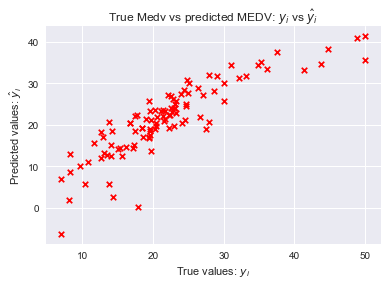

In [16]:
plt.scatter(y_test, y_pred, s=30, c='r', marker='x', linewidths=1)
plt.title("True Medv vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()

# ideadlly the scatter plot should create a linear line, but we see that our model can be improved


In [20]:
# stepwise regression 
import statsmodels.api as sm


def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162
resulting features:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']


In [21]:
# Stepwise regression proposes a model with the following features: 
# ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']

In [55]:
# test the new model with ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']
# Create X and y matrix

X_step = data.drop(['MEDV', 'INDUS', 'AGE', 'CRIM', 'RAD', 'TAX'], axis = 1)
y_step = data['MEDV']


# shuffle and split data into train and test set

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size = 0.2, random_state = 5)
print(X_train_step.shape)
print(X_test_step.shape)
print(y_train_step.shape)
print(y_test_step.shape)

(404, 8)
(102, 8)
(404,)
(102,)


In [57]:
# run linear regression

lm = LinearRegression()
model_step = lm.fit(X_train_step, y_train_step)


y_step_pred = lm.predict(X_test_step)
# Accuracy of the prediction
r_squared = lm.score(X_test_step, y_test_step)
adj_r_squared = 1 - (1-r_squared)*(len(y_test_step)-1)/(len(y_test_step)-X_test_step.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)

# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test_step,y_step_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_step,y_step_pred)))

r square:  0.749017254796
adjusted r squared:  0.72742734123
MSE:  19.6504101
RMSE:  4.43287830873


In [ ]:
# We see an improvement in adjusted r squared value from 0.694072394196 to 0.72742734123.
# MSE and RMSE have also decreased.

In [60]:
# Lasso regression performs both regularization and feature selection in order to improve the prediction of our model.
# The main hyperparameter we need to tune in a LASSO regression is the regularization factor alpha. 
# We use GridSearchCV to find the optimal alpha.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_ridge = [1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

coeffs = {}
for alpha in alpha_ridge:
    r = Lasso(alpha=alpha, normalize=True, max_iter=1000000)
    r = r.fit(X, y)
    
grid_search = GridSearchCV(Lasso(alpha=alpha, normalize=True), scoring='neg_mean_squared_error',
                           param_grid={'alpha': alpha_ridge}, cv=10, n_jobs=-1)
grid_search.fit(X, y)

print("alpha: ", grid_search.best_estimator_.alpha)
print(grid_search.score(X, y))



alpha:  0.01
-23.6765340192


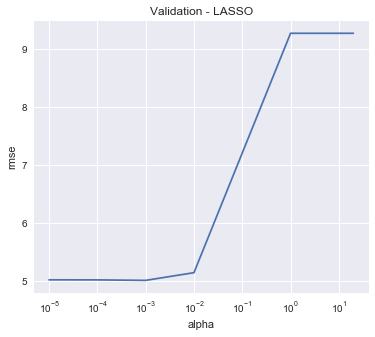

In [39]:
# visualize the root mean squared error of all the other alphas

alpha = alpha_ridge
rmse = list(np.sqrt(-grid_search.cv_results_['mean_test_score']))

plt.figure(figsize=(6,5))
lasso_cv = pd.Series(rmse, index = alpha)
lasso_cv.plot(title = "Validation - LASSO", logx=True)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [61]:
# Having identified our optimal alpha of 0.001, we now fit the model to our training data

lasso = Lasso(alpha=.01, normalize=True, max_iter=1e6)
lasso = lasso.fit(X_train, y_train)

In [62]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables" )


Lasso picked 11 variables


In [63]:
imp_coef = pd.concat([coef.sort_values().head(10)])

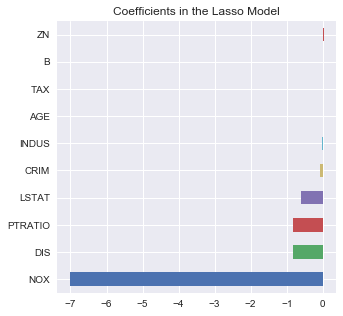

In [64]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [65]:
coef

CRIM      -0.065847
ZN         0.020675
INDUS     -0.018141
CHAS       2.373114
NOX       -7.016163
RM         3.739642
AGE       -0.000000
DIS       -0.832339
RAD        0.037528
TAX       -0.000000
PTRATIO   -0.827095
B          0.009201
LSTAT     -0.596354
dtype: float64

In [66]:
print(coef!=0)

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX         True
RM          True
AGE        False
DIS         True
RAD         True
TAX        False
PTRATIO     True
B           True
LSTAT       True
dtype: bool


In [51]:
from sklearn import linear_model

alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
#print('CV', lassocv.coef_)

#plt.plot(alphas, scores, '-ko')
#plt.axhline(lassocv_score, color='b', ls='--')
#plt.axvline(lassocv_alpha, color='b', ls='--')
#plt.xlabel(r'$\alpha$')
#plt.ylabel('Score')
#plt.xscale('log')
#sns.despine(offset=15)

0.0001 [ -1.30784669e-01   4.94114613e-02   9.47249013e-04   2.70321236e+00
  -1.59202144e+01   3.41386770e+00   1.09693368e-03  -1.49249106e+00
   3.64347199e-01  -1.31755193e-02  -9.52018315e-01   1.17502763e-02
  -5.94163533e-01]
0.000215443469003 [ -1.30767141e-01   4.94212017e-02   7.76257354e-04   2.70072592e+00
  -1.58776903e+01   3.41374580e+00   1.07160062e-03  -1.49180979e+00
   3.64260395e-01  -1.31797939e-02  -9.51612697e-01   1.17515082e-02
  -5.94264472e-01]
0.000464158883361 [ -1.30729381e-01   4.94421946e-02   4.07835034e-04   2.69536894e+00
  -1.57860734e+01   3.41348296e+00   1.01702855e-03  -1.49034208e+00
   3.64073385e-01  -1.31890037e-02  -9.50738782e-01   1.17541618e-02
  -5.94481964e-01]
0.001 [ -1.30645400e-01   4.94918886e-02  -2.03930673e-04   2.68350592e+00
  -1.55916830e+01   3.41302343e+00   9.00486367e-04  -1.48705355e+00
   3.63722569e-01  -1.32136999e-02  -9.48907330e-01   1.17601808e-02
  -5.94960807e-01]
0.00215443469003 [ -1.30467096e-01   4.95944717

In [52]:
# Grid Search for Algorithm Tuning

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.681878639687
0.0


/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, thi